Домашняя работа по вычислительной математике, задание 1.

Выполнил: Вязовцев Андрей Викторович, Б01-009


Система Лоренца:

$ x' = -\sigma (x-y)$

$ y' = -xz + rx -y$

$ z' = xy - bz$

$ x(0) = y(0) = z(0) = 1$

При $b = \frac{8}{3}$, $\sigma = 10$, $r = 28$, $0 < t \leqslant 50$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
diff_x = lambda t, x, y, z: -10.0 * (x-y)
diff_y = lambda t, x, y, z: -x*z + 28.0*x - y
diff_z = lambda t, x, y, z: x*y - 8.0 / 3.0 * z

t_start = 0.0
t_end = 50.0
x_0 = 1.0
y_0 = 1.0
z_0 = 1.0

diff_w = lambda t, w: np.array([diff_x(t, *w), diff_y(t, *w), diff_z(t, *w)])
w_0 = np.array([x_0, y_0, z_0])

In [3]:
t_plt = []
x_plt = []
y_plt = []
z_plt = []

def PltClear():
    t_plt.clear()
    x_plt.clear()
    y_plt.clear()
    z_plt.clear()

def PltAppend (t, w):
    t_plt.append(t)
    x_plt.append(w[0])
    y_plt.append(w[1])
    z_plt.append(w[2])

def Print (t, x):
    plt.rc ('font', size = 13)
    fig = plt.figure(figsize = (10, 10))
    ax  = fig.add_subplot(1,1,1)
    ax.plot (t, x)
    
def Print3D():
    plt.rc ('font', size = 13)
    fig = plt.figure(figsize = (7, 7))
    ax = fig.add_subplot(projection='3d')
    ax.plot (x_plt, y_plt, z_plt)
    
def PrintAll():
#     Print (t_plt, x_plt)
#     Print (t_plt, y_plt)
#     Print (t_plt, z_plt)
    Print3D()

## Решение с помощью метода Рунге-Кутты 3 порядка

In [4]:
k1 = lambda h, t, w: diff_w(t, w) * h
k2 = lambda h, t, w: diff_w(t + h/2, w + k1(h, t, w) / 2) * h
k3 = lambda h, t, w: diff_w(t + h, w - k1(h, t, w) + 2 * k2(h, t, w)) * h

delta_w_rk = lambda h, t, w: (k1(h, t, w) + 4 * k2(h, t, w) + k3(h, t, w)) / 6
next_w_rk = lambda h, t, w: w + delta_w_rk(h, t, w)

In [22]:
def GetW_by_RK (h):
    w = w_0
    t_i = t_start
    PltClear()
    PltAppend (t_i, w)
    while t_i <= t_end:
        w = next_w_rk(h, t_i, w)
        t_i += h
        PltAppend (t_i, w)
    PrintAll()
    return w

h = 1e-3:  [ 2.51728972 -0.68476904 25.83706518]
h = 5e-4:  [ 1.94013891  3.16125502 13.52163356]
h = 2e-4:  [ 0.14764951  0.17461304 12.92123401]
h = 1e-4:  [ 3.40852138  5.03528997 16.47383319]
h = 1e-5:  [ 2.51893699  1.40708461 22.42995221]


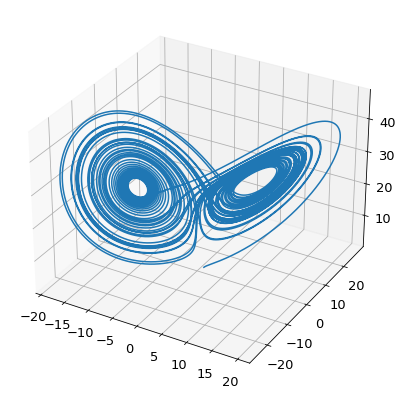

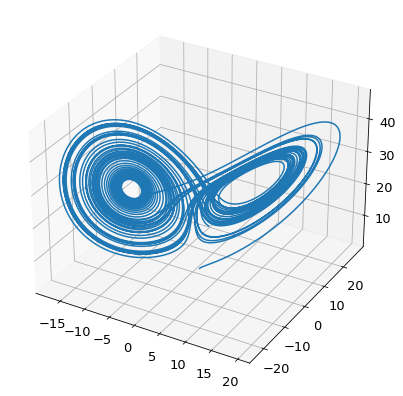

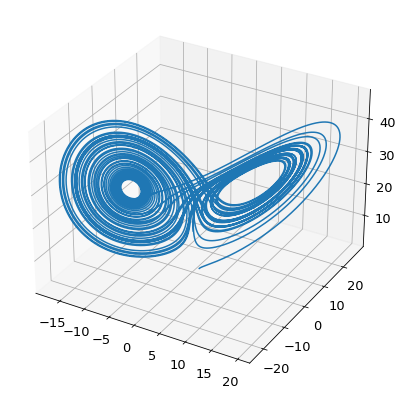

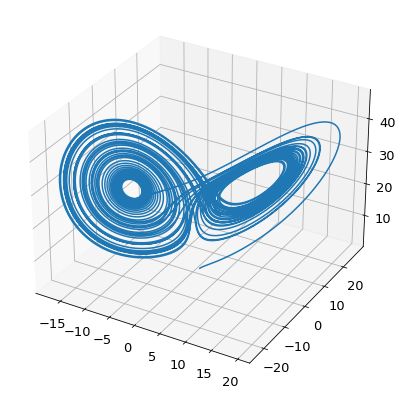

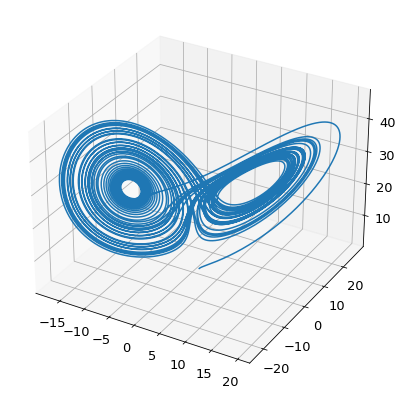

In [32]:
print ("h = 1e-3: ", GetW_by_RK (1e-3))
print ("h = 5e-4: ", GetW_by_RK (5e-4))
print ("h = 2e-4: ", GetW_by_RK (2e-4))
print ("h = 1e-4: ", GetW_by_RK (1e-4))
print ("h = 1e-5: ", GetW_by_RK (1e-5))

Можно заметить, что графики очень схожи, но система не является абсолютно устойчивой и точное решение найти проблематично.

## Решение с помощью метода Адамса 3 порядка

In [5]:
delta_w_ad = lambda h, t, w_n, w_n1, w_n2: h / 12.0 * (23 * diff_w(t, w_n) - 16 * diff_w(t-h, w_n1) +
                                                    5 * diff_w(t-2*h, w_n2))

next_w_ad = lambda h, t, w_n, w_n1, w_n2: w_n + delta_w_ad(h, t, w_n, w_n1, w_n2)

In [6]:
def GetW_by_Ad (h):
    w_list = [0, 0, w_0]
    w_list[1] = next_w_rk(h, t_start + h, w_0)
    w_list[0] = next_w_rk(h, t_start + h * 2, w_list[1])
    
    PltClear()
    PltAppend (0,     w_list[2])
    PltAppend (h,     w_list[1])
    PltAppend (h * 2, w_list[0])
    
    t_i = t_start + h * 2
    while t_i <= t_end:
        w = next_w_ad(h, t_i, *w_list)
        w_list.pop()
        w_list = [w] + w_list
        t_i += h
        PltAppend (t_i, w)
        
    PrintAll()
    return w_list[0]

h = 1e-3:  [ 2.96080596  4.49796753 15.6336525 ]
h = 5e-4:  [-0.88467766 -1.10339936 15.80351015]
h = 2e-4:  [-3.72580006 -6.1621018  14.89131116]
h = 1e-4:  [ 9.75811255 13.9877462  22.46857583]
h = 1e-5:  [ 8.73180396  3.4794939  32.93675596]


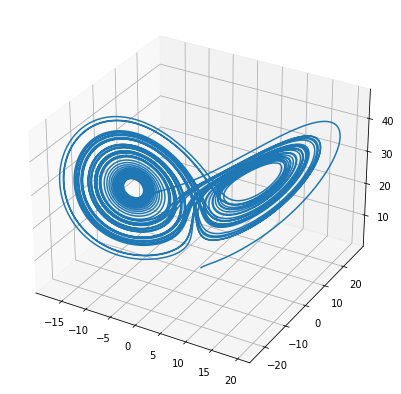

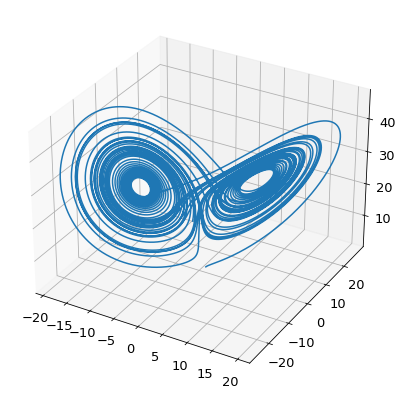

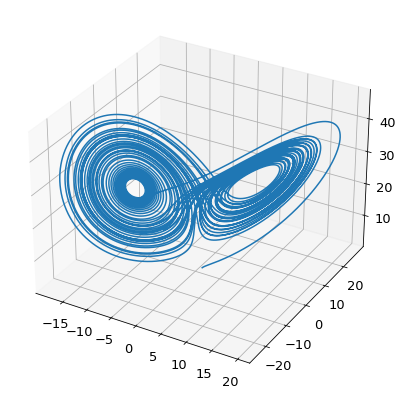

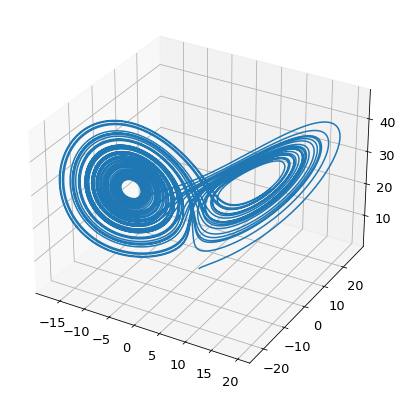

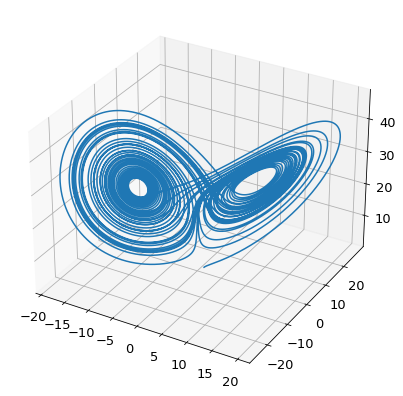

In [7]:
print ("h = 1e-3: ", GetW_by_Ad (1e-3))
print ("h = 5e-4: ", GetW_by_Ad (5e-4))
print ("h = 2e-4: ", GetW_by_Ad (2e-4))
print ("h = 1e-4: ", GetW_by_Ad (1e-4))
print ("h = 1e-5: ", GetW_by_Ad (1e-5))

Выводы можно сделать аналогичные предыдущему пункту.